# 종합실습1: 단변량 분석

## 1. 비즈니스 시나리오

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

$ $

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [6]:
# data의 열 이름 나열
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Urban', 'US'],
      dtype='object')

In [4]:
# data 간략한 정보 불러오기.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


In [ ]:
# Saless는 float형
# Shelveloc/ Urban/ US는 object형 --> 범주형


# 2. 단변량분석: 숫자형 변수

In [13]:
# 숫자형 변수 함수 선언하기.

def var1 (data, var, bins=30):
    # 기초통계량 .describe()
    print(f'<<< {var} >>>')
    print(data[[var]].describe().T) 
    
    # 시각화하기 (히스토그램 + 확률밀도함수) + 상자그림
    plt.figure(figsize=(15,10))  # 함수 사이즈 선정
    plt.subplot(2,1,1)          # 2행 1열 1번째
    sns.histplot(data[var], bins=bins, kde=True)   # kde=True옵션으로 확률밀도함수도 같이 나타냄 
    plt.grid()    # gird표시
    

    plt.subplot(2,1,2)          # 2행 1열 2번째
    sns.boxplot(x=data[var])   # 상지그림
    plt.grid() 
    
    plt.show()   # 그래프 보여주세요.
    

### 1) Sales

In [ ]:
# # Sales의 의미
# 각 지역 판매량(단위 : 1000개)


<<< Sales >>>
       count      mean       std  min   25%   50%   75%    max
Sales  400.0  7.496325  2.824115  0.0  5.39  7.49  9.32  16.27


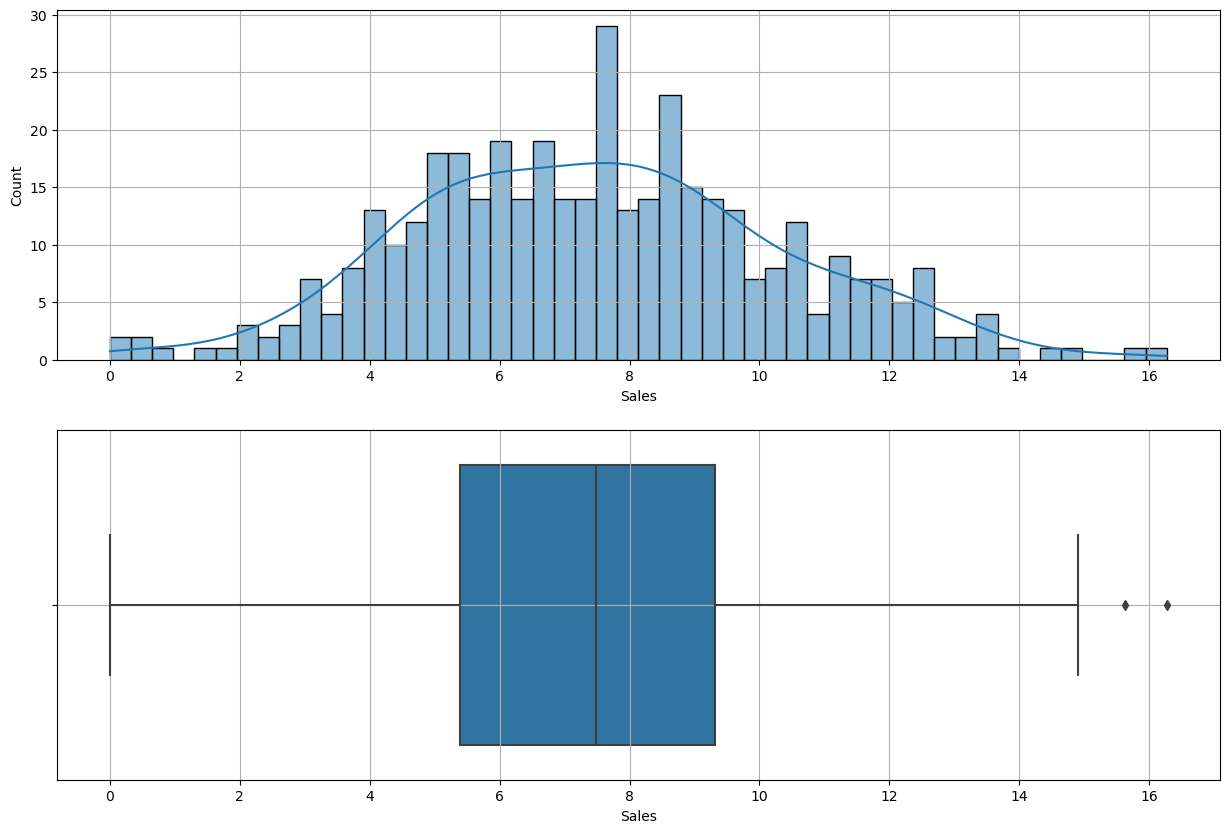

In [14]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Sales'
var1(data, var, bins=50)

In [ ]:
# ### Sales에 대한 비즈니스 관점
# - 판매량이 16인 곳과 0-2사이인 곳 전부 존재.
# - 각 집단의 소득분위, 나이대 등등을 비교분석하여 판매량이 0-2인 곳의 판매량을 증가시키는 방안을 수립.
# - 중앙값 = 평균이 비슷하기 때문에 정상적인 정규분포를 띔.

$ $

### 2) CompPrice

In [ ]:
# # CompPrice의 의미
# 경쟁사 상품 가격

# # 제품 vs 상품
#  -제품: 원료를 써서 물건을 만듦. 공장에서 바로 만든 물건.
#  -상품: 사고 파는 물건. 매장에서 실제로 판매하는 물건.

<<< CompPrice >>>
           count     mean        std   min    25%    50%    75%    max
CompPrice  400.0  124.975  15.334512  77.0  115.0  125.0  135.0  175.0


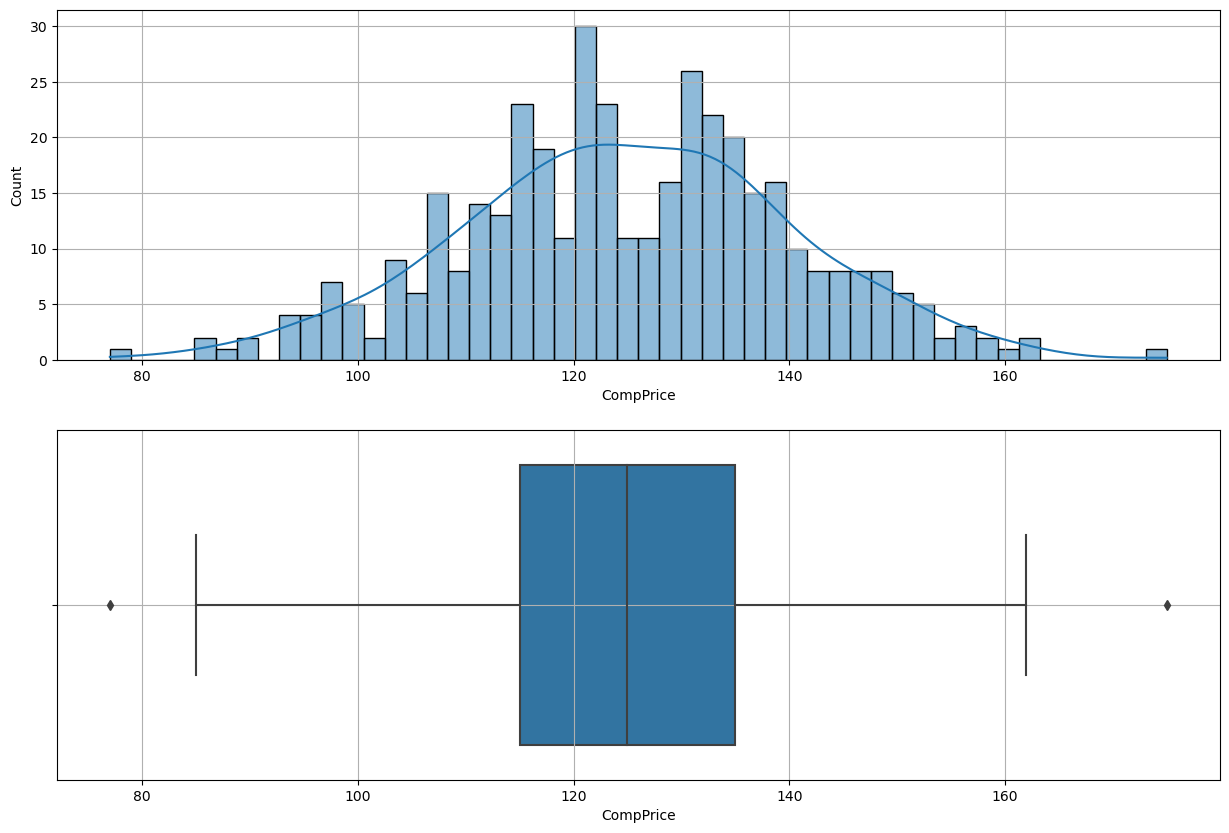

In [15]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'CompPrice'
var1(data, var, bins=50)

In [ ]:
# ### CompPrice에 대한 비즈니스 관점
# - min값과 max값이 IRQ범위에 벗어나는 아웃라이어가 존재
# - 어떤 이유로 가장 낮은 가격과 가장 높은 가격을 책정한 상품이 존재하는지? ex) 재고처리? 퀄리티? 
# - 경쟁사 상품 가격이 자사 상품 가격에 비해 편차가 적음.


$ $

### 3) Income

In [ ]:
# # Income의 의미
# 지역 평균 소득(단위 : 1000달러)

<<< Income >>>
        count     mean        std   min    25%   50%   75%    max
Income  400.0  68.6575  27.986037  21.0  42.75  69.0  91.0  120.0


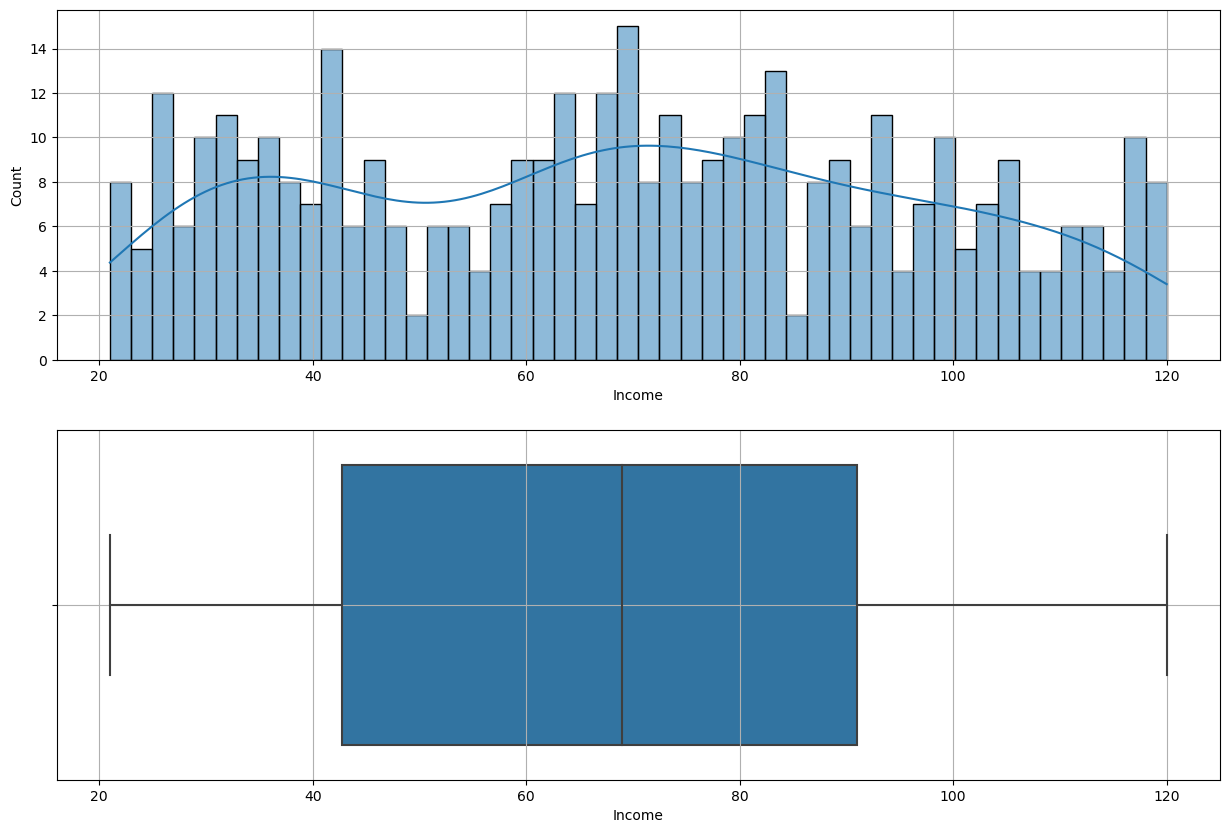

In [17]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Income'
var1(data, var, bins=50)

In [ ]:
# ### Income에 대한 비즈니스 관점
# - 전 구간에 균등하게 분포되어 있음(균등분포)
# - 40중반-50후반의 값은 중앙에 위치되어 있음에도 불구하고 개수가 적음. 특별한 이유가 있나?
# - 소득을 기준으로 3개 집단을 만든 후, 각 집단의 특징을 알아봄.


$ $

### 4) Advertising

In [ ]:
# Advertising의 의미
# 지역 광고비 예산(단위 1000달러)

<<< Advertising >>>
             count   mean       std  min  25%  50%   75%   max
Advertising  400.0  6.635  6.650364  0.0  0.0  5.0  12.0  29.0


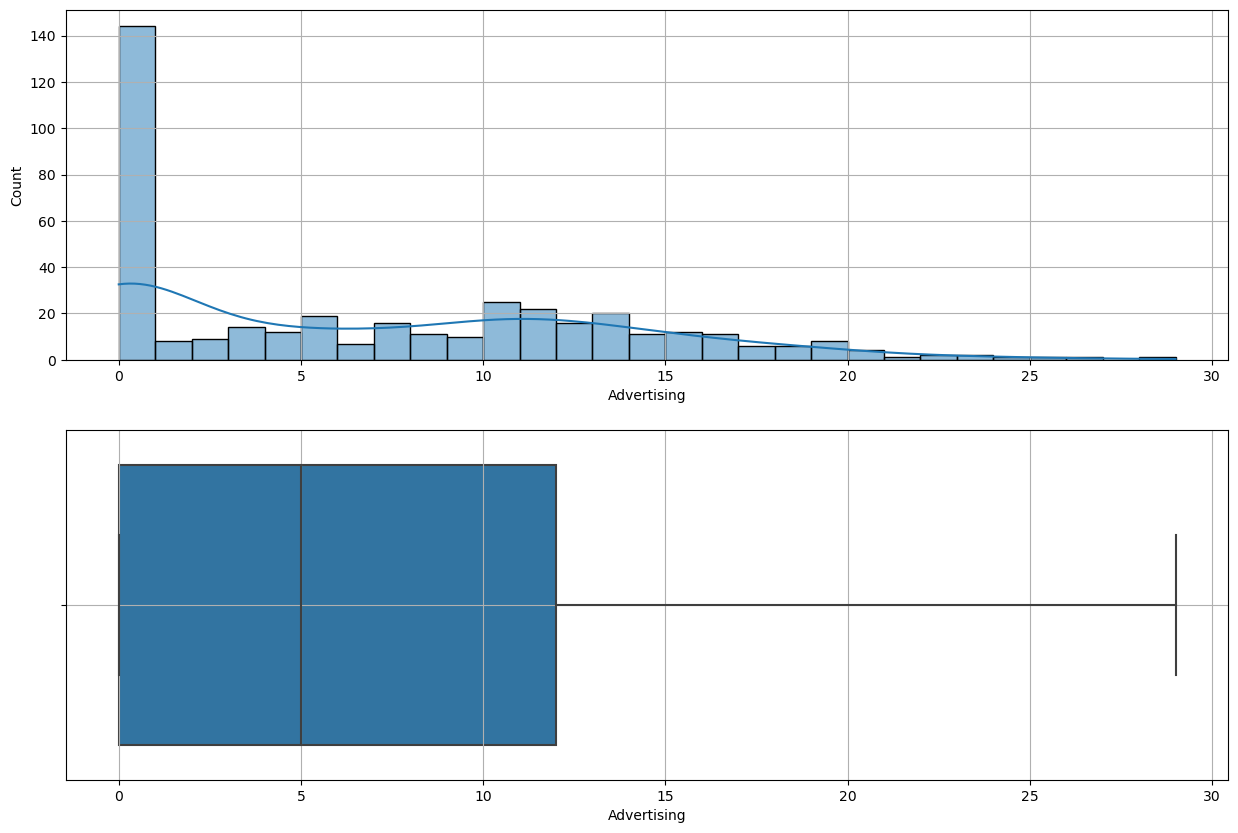

In [19]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Advertising'
var1(data, var, bins=29)     # 구간이 29개 있어서 bins=29로 설정.
                             # 한 칸의 의미가 값의 크기

<<< Advertising >>>
             count       mean       std  min  25%   50%   75%   max
Advertising  256.0  10.367188  5.509879  1.0  6.0  10.0  14.0  29.0


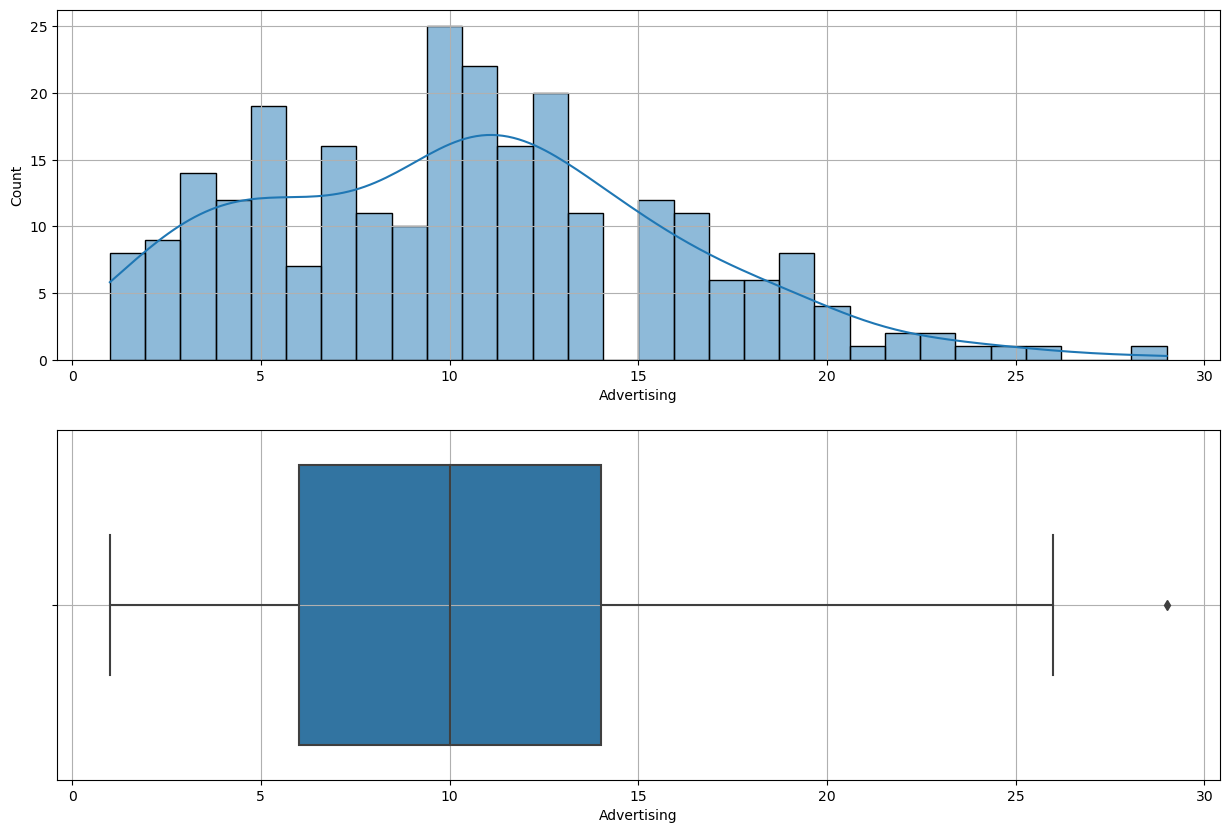

In [22]:
# Advertising값이 0인 개수 구하기
data.loc[data['Advertising']==0].count()

# 광고비가 0인 데이터를 빼고 다시 수행.
data1 = data.loc[data['Advertising']>0]
var = 'Advertising'
var1(data1, var, bins=30)  

In [ ]:
# ### Advertising에 대한 비즈니스 관점
# - 광고비가 0으로 책정된 지역이 144개 존재.
# - 어째서 광고비가 0으로 책정된 지역이 이렇게 많은지? 왜 그렇게 결정되었는지?
# - 광고비 0을 제외한 나머지 값들은 정규분포를 띄고 있음으로 값이 있는 데이터에 대한 추가 분석 필요.




$ $

### 5) Population

In [ ]:
# # Population의 의미
# 지역 인구수(단위 : 1000명)

<<< Population >>>
            count    mean         std   min    25%    50%    75%    max
Population  400.0  264.84  147.376436  10.0  139.0  272.0  398.5  509.0


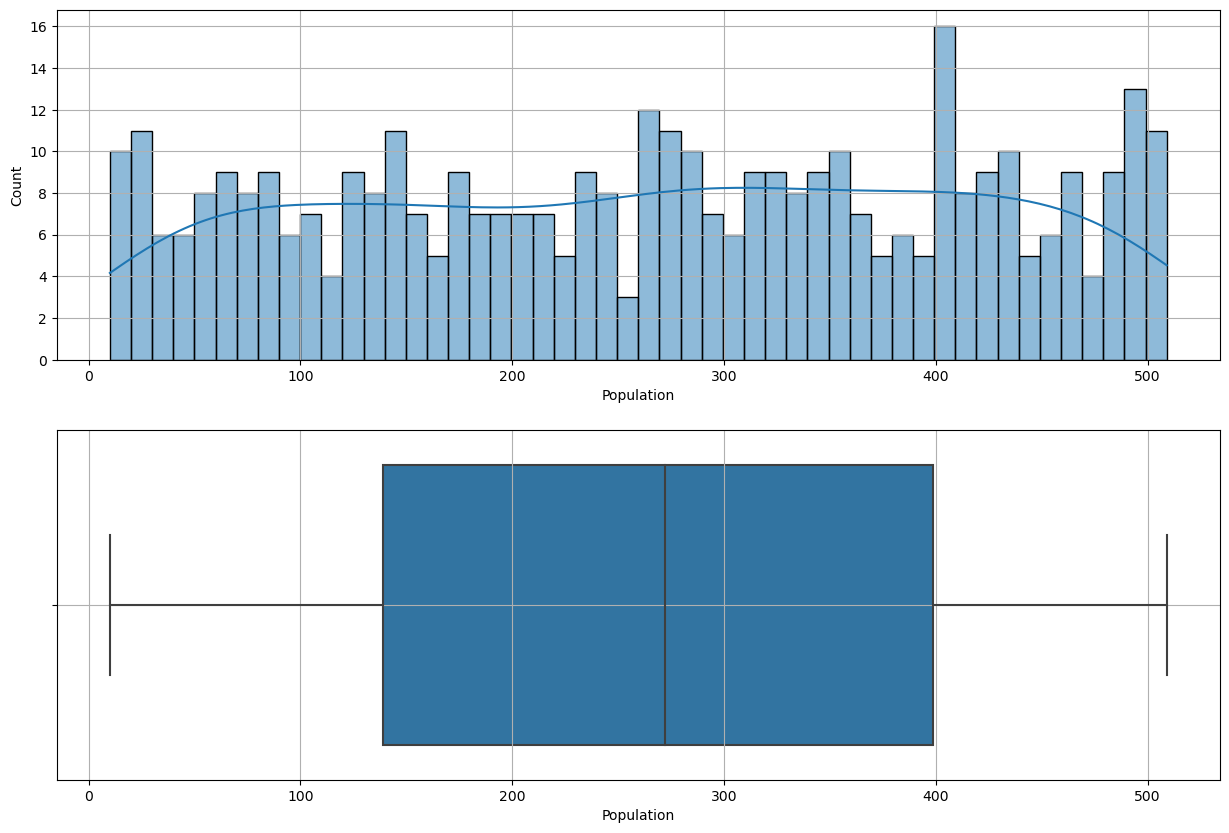

In [23]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Population'
var1(data, var, bins=50)

In [ ]:
# ### Population에 대한 비즈니스 관점
# -정규성을 띄지 않고, 모든 구간에 데이터가 일정하게 분포되어 있음.(균등 분포)
# -인구수와 매출의 관계성을 분석할 필요 있음
# -인구가 많으면 잠재고객이 많다고 가정할 수 있어서 많은 지역 위주로 광고예산을 높게 책정할 수 있음
# -509이상이 없는 걸 보니 사내정책에 500이상이면 매장을 2개 설립한다는 등의 규제가 들어갔음을 추측.

$ $

### 6) Price

In [ ]:
# # Price의 의미
# 자사 지역별 판매가격

<<< Price >>>
       count     mean        std   min    25%    50%    75%    max
Price  400.0  115.795  23.676664  24.0  100.0  117.0  131.0  191.0


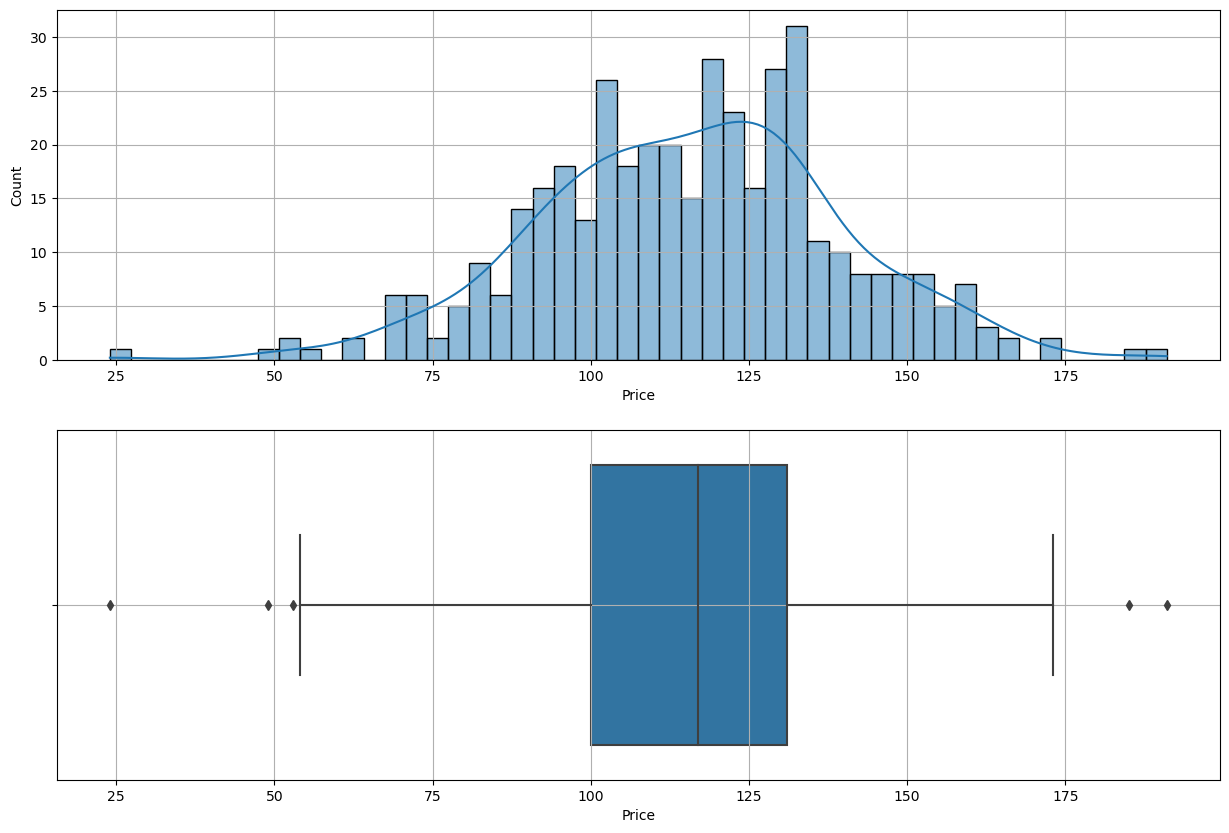

In [24]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Price'
var1(data, var, bins=50)

##### (추가) 경쟁사와 자사 상품 가격 비교

<function matplotlib.pyplot.show(close=None, block=None)>

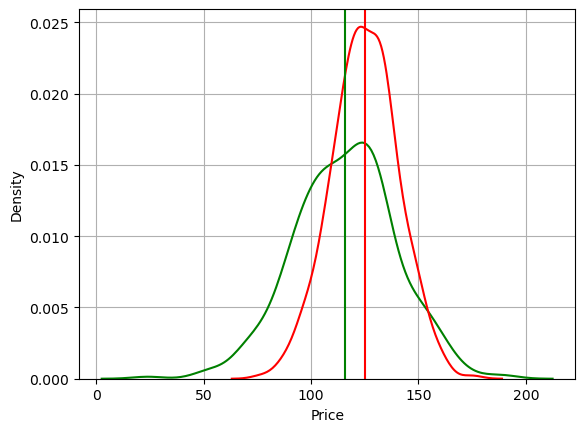

In [26]:
sns.kdeplot(x='Price', data=data, color='g')
sns.kdeplot(x='CompPrice', data=data, color='r')

P_mean = data['Price'].mean()    # 평균을 변수화
C_mean = data['CompPrice'].mean()
plt.axvline(P_mean, color='g') # 자사 가격 평균값 수직선 추가
plt.axvline(C_mean, color='r')  # 타사 가격 평균값 수직선 추가

plt.grid()
plt.show

In [ ]:
# ### Price에 대한 비즈니스 관점
# - 판매가격이 낮은 곳은 아이가 없는 지역일 것이다.
#     -> 30-40대보다 노년층이 높을 확률이 있다.
#     -> why? 해당 상품이 필요가 없기 때문에, 상대적으로 소득이 낮기 때문에

### 7) Age

In [ ]:
# # Age의 의미
# 연령층

<<< Age >>>
     count     mean        std   min    25%   50%   75%   max
Age  400.0  53.3225  16.200297  25.0  39.75  54.5  66.0  80.0


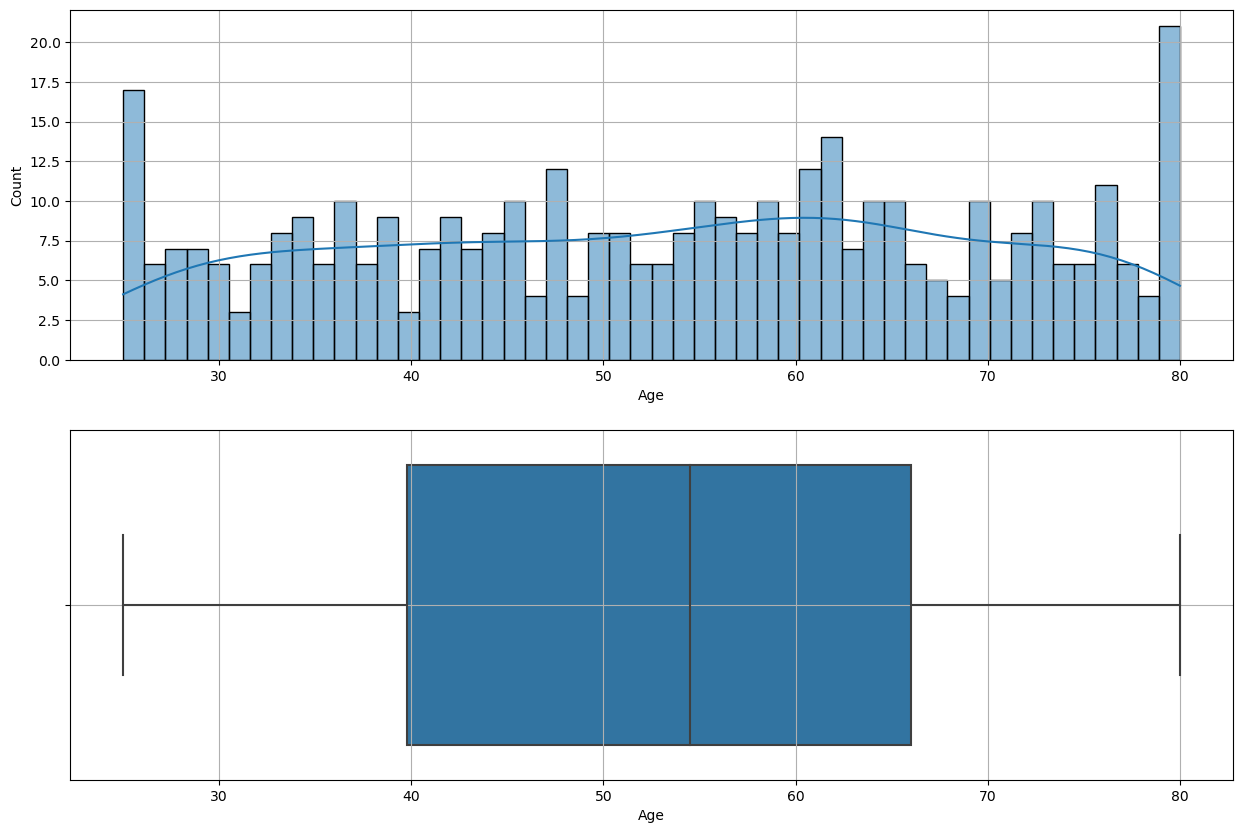

In [27]:
# 선언한 var1 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Age'
var1(data, var, bins=50)

In [ ]:
### Age에 대한 비즈니스 관점
- 모든 구간에서 균등하게 분포되어 있다.

##### (추가) 연령별 구간을 나눠 분포 확인

In [33]:
# 구간 나누기
# 구간 나누기  cut(), 변수 사용o

bin = [-np.inf, 40, 50, 60, 70, np.inf]   # 구간 5
label = ['~40', '40', '50', '60', '70~']      # 이름 5
data['Age1'] = pd.cut(data['Age'], bins=bin, labels=label)

# 확인
data['Age1'].value_counts()

~40    103
60      78
70~     77
50      73
40      69
Name: Age1, dtype: int64

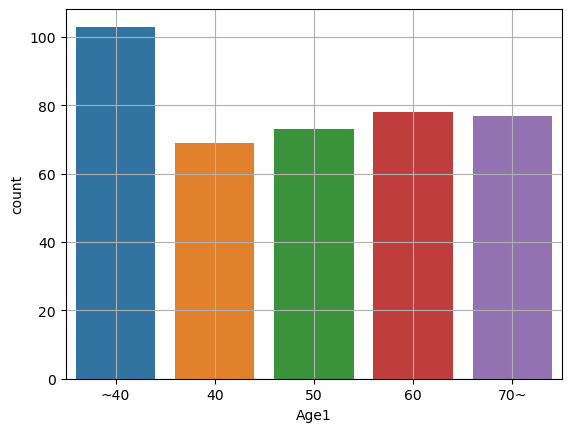

In [34]:
 ##  막대그래프로 개수 셈.   ## 한글 깨짐
sns.countplot(x='Age1', data=data)
plt.grid()
plt.show()


$ $

$ $

# 3. 단변량분석: 범주형 변수

In [35]:
# 범주형 변수에 대한 단변량 분석 함수 
def var2(data, var) : 
    # 기초 통계량 
    print(f'<<< {var} >>>')
    cnt = data[var].value_counts()        # 범주별 빈도수
    prop = data[var].value_counts()/data.shape[0]      # 범주별 비율
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values}) 
    display(temp) 
    
    # 시각화 
    sns.countplot(x = var, data = data) 
    plt.grid() 
    plt.show()

### 1) ShelveLoc

In [ ]:
# # ShelveLoc 의미
# 매장 진열 상태: 'Good', 'Median', 'Bad'

<<< ShelveLoc >>>


,Class,Count,Prop
0,Medium,219,0.5475
1,Bad,96,0.2400
2,Good,85,0.2125


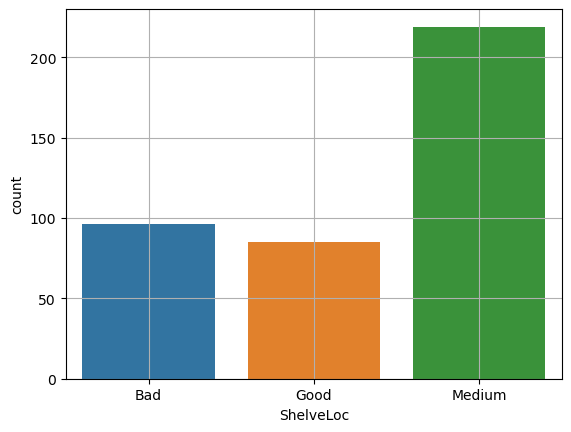

In [36]:
# 선언한 var2 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'ShelveLoc' 
var2(data, var)

In [ ]:
# # ShelveLoc에 대한 비즈니스 관점
# - 직영점의 경우 진열팀이 따로 존재. 
#     -> 모든 매장에 집중할 수 없기 때문에 단순히 사장의 감각능력보다는
#       전략적으로 관리를 잘 못했다고 생각할 수 있음.
# - 매장의 규모에 따라 진열상태를 판단했는지?
# - 진열상태와 매출이 유의미하게 상관관계가 있는지?


$ $

### 2) Urban

In [ ]:
# # Urban 의미
# 도시인지? 교외인지?

<<< Urban >>>


,Class,Count,Prop
0,Yes,282,0.705
1,No,118,0.295


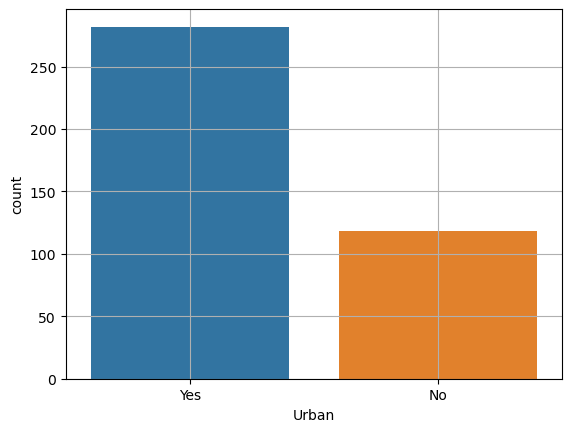

In [37]:
# 선언한 var2 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'Urban' 
var2(data, var)

In [ ]:
# Urban에 대한 비즈니스 관점
- 교외보다 도심의 비율이 2배 이상임. 그러나 교외가 1/3정도이기에 무시할 수 있는 수치 x
- 교외지역의 경우 차량이동의 시간이 길기 때문에 카시트의 구매량이 더 많지 않을까? 추측


### 3) US

In [ ]:
# # US 의미
# 매장이 미국에 있는지 여부(Yes,No)

<<< US >>>


,Class,Count,Prop
0,Yes,258,0.645
1,No,142,0.355


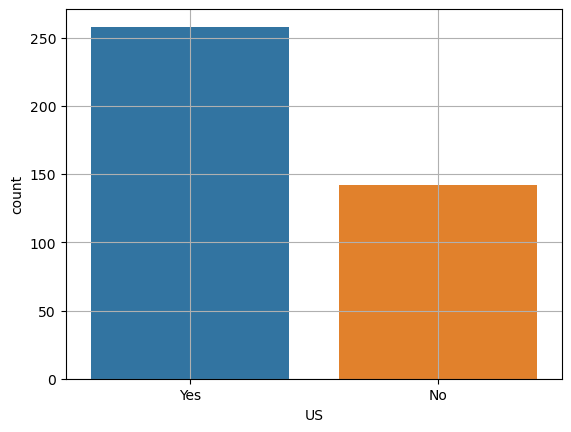

In [39]:
# 선언한 var2 함수에다가 변수값만 집어넣어 기초통계량과 시각화 보여줌
var = 'US' 
var2(data, var)

In [ ]:
# US에 대한 비즈니스 관점
- 2/3은 미국에 매장이 있음. 
    -> 1/3은 미국에 매장이 없음. 그럼 대략 어떤 지역에 매장이 있는지? 